In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import accuracy_score
import seaborn as sb

In [2]:
data = pd.read_csv("ck_plus.csv")

In [3]:
data

,emotion,pixels
0,0,130 129 127 128 46 15 10 10 10 12 16 17 11 12 ...
1,0,136 128 115 131 103 107 36 9 10 7 11 9 8 8 9 9...
2,0,132 133 132 124 42 9 8 9 11 10 6 7 11 5 5 8 8 ...
3,0,125 65 74 96 32 14 10 8 7 8 7 9 7 8 9 11 10 10...
4,0,134 135 127 24 44 16 21 24 26 31 34 52 69 93 1...
...,...,...
32849,7,145 33 13 8 11 16 27 43 56 66 80 84 87 91 96 1...
32850,7,92 14 12 8 13 20 33 45 59 70 87 86 86 99 108 1...
32851,7,52 33 6 4 12 9 4 3 8 10 17 18 14 12 17 21 46 8...
32852,7,32 8 4 7 7 2 2 9 10 16 18 16 15 20 20 50 107 1...


In [4]:
images = []
labels = []

In [5]:
for index, row in data.iterrows():
    image = np.fromstring(row['pixels'], dtype=int, sep=' ')
    image = np.reshape(image, (48, 48, 1))
    image = image.astype('float32')/255
    images.append(image)
    labels.append(row['emotion'])

In [6]:
emotions = {0: 'anger', 1: 'contempt', 2: 'disgust', 3: 'fear', 4: 'happiness', 5: 'neutrality', 6: 'sadness', 7: 'surprise'}

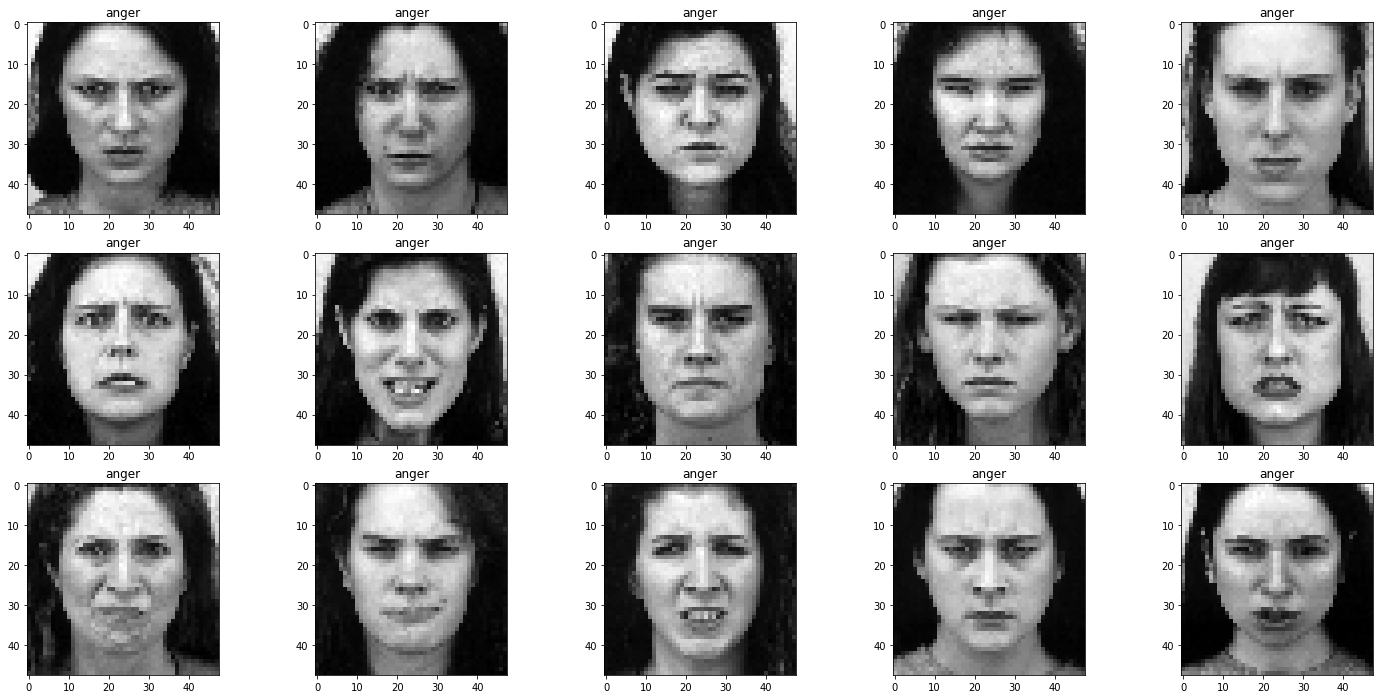

In [7]:
fig, axs = plt.subplots(3, 5, figsize=(25, 12))
axs = axs.ravel()
for i in range(15):
    axs[i].imshow(images[i][:,:,0], cmap='gray')
    axs[i].set_title(str(emotions[labels[i]]))

In [8]:
labels = to_categorical(labels)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=27021994)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=27021994)

In [9]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

val_images = np.array(val_images)
val_labels = np.array(val_labels)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(8, activation='softmax'))

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history=model.fit(
    x=train_images, 
    y=train_labels,
    epochs=100,
    callbacks=my_callbacks,
    validation_data=(val_images, val_labels),
    batch_size=32
)

Epoch 1/100
616/616 [==============================] - 12s 11ms/step - loss: 2.5388 - accuracy: 0.2014 - val_loss: 1.8444 - val_accuracy: 0.3356
Epoch 2/100
616/616 [==============================] - 6s 10ms/step - loss: 1.7069 - accuracy: 0.3594 - val_loss: 1.5169 - val_accuracy: 0.4284
Epoch 3/100
616/616 [==============================] - 6s 9ms/step - loss: 1.5181 - accuracy: 0.4285 - val_loss: 1.5026 - val_accuracy: 0.4488
Epoch 4/100
616/616 [==============================] - 6s 9ms/step - loss: 1.4383 - accuracy: 0.4596 - val_loss: 1.2925 - val_accuracy: 0.5258
Epoch 5/100
616/616 [==============================] - 6s 9ms/step - loss: 1.3530 - accuracy: 0.4912 - val_loss: 1.3389 - val_accuracy: 0.5123
Epoch 6/100
616/616 [==============================] - 6s 9ms/step - loss: 1.3018 - accuracy: 0.5161 - val_loss: 1.1791 - val_accuracy: 0.5666
Epoch 7/100
616/616 [==============================] - 6s 9ms/step - loss: 1.2611 - accuracy: 0.5371 - val_loss: 1.1905 - val_accuracy: 0.5

In [12]:
predictions=[np.argmax(im) for im in model.predict(test_images)]
labels = [np.argmax(i) for i in test_labels]
accuracy_score(predictions,labels)

0.6845229036676305

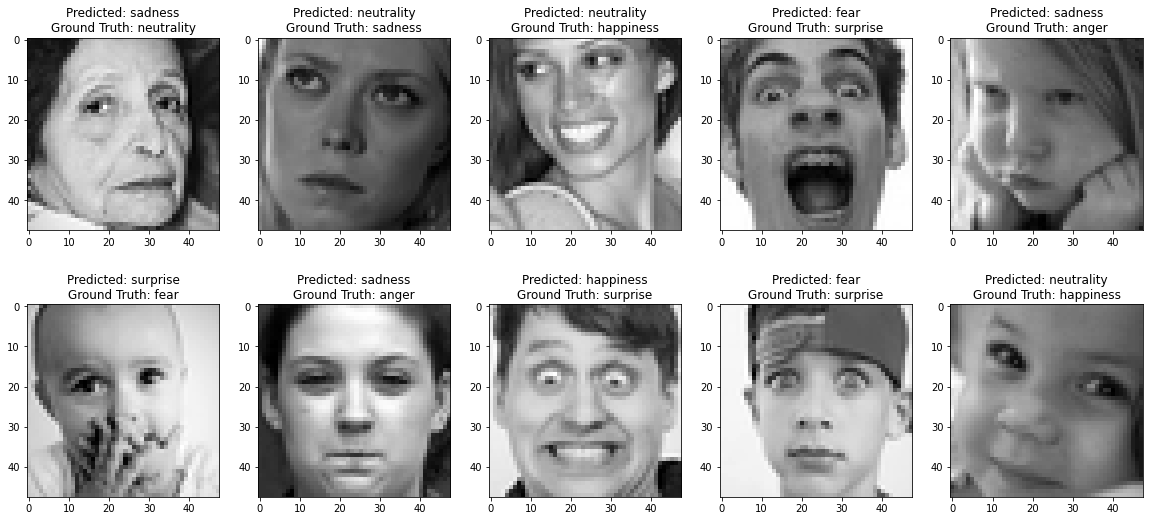

In [13]:
cols = 0
rows = 0
disagree = []

for i in range(len(labels)):
    if labels[i] != predictions[i]:
        disagree.append(i)
        if len(disagree) == 10:
            break

fig, axs = plt.subplots(2, 5, figsize=(20,9))

for i in range(10):
    image=(np.array(list(test_images)[disagree[i]])/256)[:,:,0]
    axs[cols, rows].imshow(image, cmap='gray')
    axs[cols, rows].set_title('Predicted: ' + str(emotions[predictions[disagree[i]]]) + '\nGround Truth: ' + str(emotions[labels[disagree[i]]]))
    rows = rows+1
    if rows == 5:
        cols = cols + 1
        rows = 0

<AxesSubplot:>

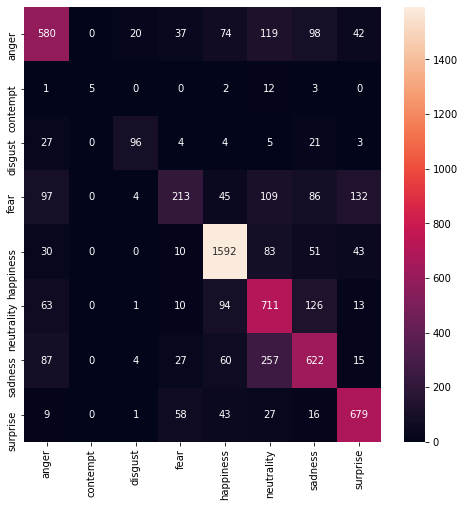

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
sb.heatmap(ax=ax, 
           data=pd.DataFrame(tf.math.confusion_matrix(labels, predictions, num_classes=8).numpy().astype(int), 
                     index=['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutrality', 'sadness', 'surprise'], 
                     columns=['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutrality', 'sadness', 'surprise']
           ), 
           annot=True, 
           annot_kws={"size": 10},
           fmt='g'
          )